<a href="https://colab.research.google.com/github/TejasriK-888/data-mining/blob/main/DM(PREPROCESS).IPYNB" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DIABETIC RETINOPATHY PREPROCESSING
AND CLASSIFICATION ALGORITHMS

In [ ]:
pip install Pillow matplotlib numpy opencv-python scikit-learn

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to your image folder
folder_path = r"C:\Users\pl\Downloads\diabetic-retinopathy-classification-2\retina-train"

# List to store images
images = []

# Loop through the folder and load images
for filename in os.listdir(folder_path):
    if filename.endswith('.jpeg') or filename.endswith('.jpg'):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        images.append(img)

# Display the first few images
plt.figure(figsize=(10, 10))
for i in range(min(9, len(images))):  # Display up to 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()


Checking folder path: D:\diabetic-retinopathy-classification-2\retina-train
Folder path does not exist!


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\diabetic-retinopathy-classification-2\\retina-train'

In [ ]:
# Resize images
target_size = (224, 224)  # Change this to your model's input size

resized_images = []
for img in images:
    img_resized = img.resize(target_size)
    resized_images.append(img_resized)

print(f"Resized images to {target_size}.")


Resized images to (224, 224).


In [ ]:
import numpy as np

# Convert images to NumPy arrays
image_arrays = []
for img in resized_images:
    img_array = np.array(img)
    image_arrays.append(img_array)

# Convert the list to a NumPy array
image_arrays = np.array(image_arrays)
print(f"Converted images to NumPy arrays with shape: {image_arrays.shape}.")


Converted images to NumPy arrays with shape: (2086, 224, 224, 3).


In [ ]:
# Normalize pixel values to [0, 1]
normalized_images = image_arrays / 255.0
print("Normalized pixel values to range [0, 1].")


Normalized pixel values to range [0, 1].


In [ ]:
'''import random

def augment_image(image_array):
    if random.random() > 0.5:  # 50% chance to flip
        return np.fliplr(image_array)  # Horizontal flip
    return image_array

# Apply augmentation
augmented_images = [augment_image(img) for img in normalized_images]
print(f"Applied data augmentation. Number of images: {len(augmented_images)}.") '''


'import random\n\ndef augment_image(image_array):\n    if random.random() > 0.5:  # 50% chance to flip\n        return np.fliplr(image_array)  # Horizontal flip\n    return image_array\n\n# Apply augmentation\naugmented_images = [augment_image(img) for img in normalized_images]\nprint(f"Applied data augmentation. Number of images: {len(augmented_images)}.") '

In [ ]:
# If you want to flatten the normalized images (without augmentation)
X_flat = normalized_images.reshape(normalized_images.shape[0], -1)  # Reshape to (num_samples, num_features)
print(f"Flattened images to shape: {X_flat.shape}.")


Flattened images to shape: (2086, 150528).


In [ ]:
from sklearn.model_selection import train_test_split
# Step 6: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_flat, cluster_labels, test_size=0.2, random_state=42)
print(f"Split dataset into {len(X_train)} training and {len(X_test)} testing samples.")

Split dataset into 1668 training and 418 testing samples.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


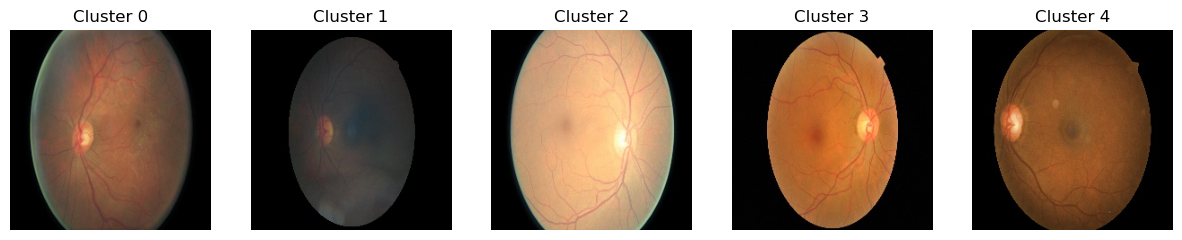

In [ ]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Using k-means clustering on the flattened images
num_clusters = 5  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_flat)

# Get the cluster labels for each image
cluster_labels = kmeans.labels_

# Visualize some clustered images
def plot_clustered_images(images, cluster_labels, num_clusters):
    plt.figure(figsize=(15, 10))
    for cluster in range(num_clusters):
        plt.subplot(1, num_clusters, cluster + 1)
        cluster_images = images[cluster_labels == cluster]
        # Display the first image in the cluster
        if cluster_images.size > 0:
            plt.imshow(cluster_images[0].reshape(224, 224, 3))  # Reshape for visualization
        plt.title(f'Cluster {cluster}')
        plt.axis('off')
    plt.show()

plot_clustered_images(normalized_images, cluster_labels, num_clusters)


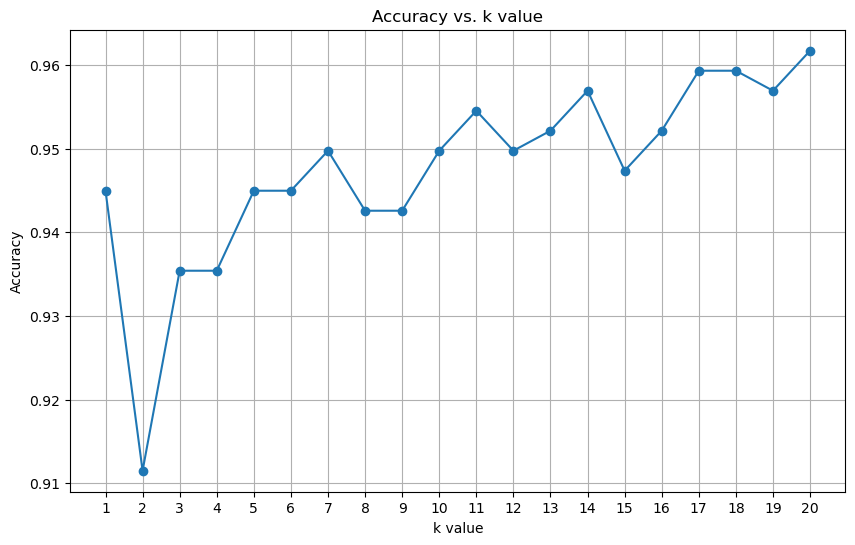

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Range of k values to test
k_values = range(1, 21)
accuracies = []

# Train and test for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k value')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
k = k_values[accuracies.index(max(accuracies))]
print(f"The optimal k value is: {k}")


The optimal k value is: 20


In [ ]:

# Step 7: Train the k-NN Model  # Choose the value for k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=20)

In [ ]:
# Step 8: Make Predictions
y_pred = knn.predict(X_test)
y_pred

array([1, 2, 3, 4, 2, 1, 0, 0, 4, 2, 4, 3, 3, 1, 1, 1, 4, 2, 3, 0, 0, 0,
       3, 4, 4, 1, 4, 2, 2, 1, 1, 2, 4, 1, 4, 2, 4, 3, 1, 2, 0, 0, 1, 4,
       0, 0, 4, 3, 2, 1, 1, 4, 4, 0, 1, 3, 0, 3, 4, 0, 1, 2, 4, 3, 3, 1,
       3, 1, 1, 3, 4, 3, 2, 4, 1, 3, 4, 2, 1, 1, 3, 3, 3, 4, 4, 4, 3, 2,
       0, 4, 1, 2, 4, 2, 2, 0, 3, 3, 3, 4, 3, 1, 0, 0, 2, 2, 1, 2, 1, 4,
       0, 1, 0, 4, 4, 2, 0, 3, 3, 1, 2, 2, 2, 3, 3, 3, 1, 1, 3, 4, 4, 0,
       4, 3, 1, 2, 3, 0, 4, 3, 2, 4, 0, 4, 1, 0, 3, 4, 3, 1, 4, 4, 3, 0,
       4, 0, 3, 0, 4, 0, 3, 2, 2, 2, 4, 4, 2, 0, 3, 1, 1, 1, 1, 2, 3, 4,
       0, 0, 1, 1, 2, 0, 1, 4, 3, 4, 3, 1, 2, 0, 3, 3, 1, 1, 2, 3, 0, 3,
       1, 4, 1, 3, 1, 2, 3, 4, 1, 0, 0, 3, 2, 3, 3, 0, 2, 3, 3, 0, 4, 4,
       2, 1, 2, 4, 0, 0, 0, 4, 1, 3, 3, 3, 1, 3, 3, 0, 0, 1, 1, 4, 1, 4,
       4, 1, 4, 4, 2, 1, 4, 4, 3, 4, 4, 0, 2, 0, 3, 3, 4, 4, 3, 0, 3, 1,
       4, 1, 4, 1, 1, 4, 3, 1, 1, 3, 0, 0, 3, 2, 4, 3, 4, 0, 3, 4, 3, 0,
       0, 3, 3, 4, 0, 4, 1, 0, 1, 3, 3, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Step 9: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        74
           1       0.96      0.97      0.96        88
           2       0.98      0.97      0.97        58
           3       0.97      0.96      0.97       106
           4       0.95      0.99      0.97        92

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418

Confusion Matrix:
[[ 68   0   1   1   4]
 [  0  85   0   2   1]
 [  2   0  56   0   0]
 [  0   4   0 102   0]
 [  1   0   0   0  91]]


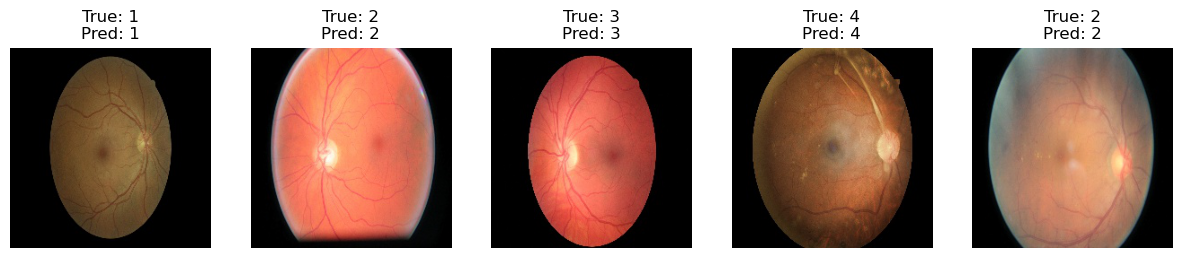

In [ ]:

# Step 10: Visualize Predictions
def plot_images(images, true_labels, pred_labels, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(224, 224, 3))  # Reshape for visualization
        plt.title(f'True: {true_labels[i]}\nPred: {pred_labels[i]}')
        plt.axis('off')
    plt.show()

# Plot the first few test images with their predictions
plot_images(X_test, y_test[:5], y_pred[:5])

In [ ]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")   # the flatened image shapes
print(f"y_train shape: {y_train.shape}")  # Should be (num_samples, num_classes)
print(f"y_test shape: {y_test.shape}")    # Should be (num_samples, num_classes)


X_train shape: (1668, 224, 224, 3)
X_test shape: (418, 224, 224, 3)
y_train shape: (1668,)
y_test shape: (418,)


In [ ]:
# Assuming X_train_flattened is your flattened training data
X_train = X_train.reshape(-1, 224, 224, 3)
X_test = X_test.reshape(-1, 224, 224, 3)

from tensorflow.keras.utils import to_categorical

# Assuming y_train and y_test are your label arrays
# Convert to one-hot encoding
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Check the shapes after encoding
print(f"X_train shape: {X_train.shape}")  # Should be (num_samples, 224, 224, 3)
print(f"X_test shape: {X_test.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")  # Should be (1668, num_classes)
print(f"y_test_encoded shape: {y_test_encoded.shape}")    # Should be (418, num_classes)

X_train shape: (1668, 224, 224, 3)
X_test shape: (418, 224, 224, 3)
y_train_encoded shape: (1668, 5)
y_test_encoded shape: (418, 5)


In [ ]:
num_classes=5
# Step 5: Build the CNN Model
model = Sequential([
    Input(shape=(224, 224, 3)),  # Specify the input shape here
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer
])

In [ ]:
# Step 6: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
  # Should be (num_samples, 224, 224, 3)
# Step 7: Train the Model
history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=10, batch_size=32)

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 487ms/step - accuracy: 0.4841 - loss: 1.2396 - val_accuracy: 0.6675 - val_loss: 0.6050
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 26s 481ms/step - accuracy: 0.7825 - loss: 0.4846 - val_accuracy: 0.9402 - val_loss: 0.1912
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 26s 483ms/step - accuracy: 0.8672 - loss: 0.3200 - val_accuracy: 0.9498 - val_loss: 0.1825
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 29s 539ms/step - accuracy: 0.9061 - loss: 0.2495 - val_accuracy: 0.9522 - val_loss: 0.1466
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 518ms/step - accuracy: 0.8864 - loss: 0.2562 - val_accuracy: 0.9211 - val_loss: 0.1855
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 26s 498ms/step - accuracy: 0.8996 - loss: 0.2293 - val_accuracy: 0.8852 - val_loss: 0.2549
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 26s 490ms/step - accuracy: 0.8863 - loss: 0.2803 - val_accuracy: 0.9378 - val_loss: 0.1510
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 504ms/step - accuracy: 0.9169 - loss: 0.2053 - val_accu

In [ ]:
# Print the loss and accuracy for each epoch
print("Training Loss and Accuracy for each epoch:")
for epoch in range(len(history.history['loss'])):
    print(f"Epoch {epoch + 1}: Loss = {history.history['loss'][epoch]}, Accuracy = {history.history['accuracy'][epoch]}")

print("\nValidation Loss and Accuracy for each epoch:")
for epoch in range(len(history.history['val_loss'])):
    print(f"Epoch {epoch + 1}: Val Loss = {history.history['val_loss'][epoch]}, Val Accuracy = {history.history['val_accuracy'][epoch]}")


Training Loss and Accuracy for each epoch:


NameError: name 'history' is not defined